import file 

In [8]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff 


read new data after clean

In [9]:
movie=pd.read_csv('movie_after_cleaning.csv') 


read splits 

In [10]:
splits = pd.read_excel("splits_movie.xlsx", sheet_name=None)


EDA

What are the basic statistics for numerical columns like worldwide_gross, year, and votes_number?


In [11]:
movie.describe()

,rating,votes,year,duration,worldwide_gross
count,3511.000000,3.511000e+03,3511.000000,3511.000000,3.363000e+03
mean,7.099089,2.158614e+05,2003.064654,115.076047,1.477534e+08
std,0.653912,2.500663e+05,16.488089,22.288926,2.356191e+08
min,6.000000,5.001000e+04,1920.000000,26.000000,6.700000e+01
25%,6.600000,7.680200e+04,1997.000000,99.000000,2.022059e+07
50%,7.100000,1.280640e+05,2007.000000,112.000000,6.360542e+07
75%,7.600000,2.468165e+05,2014.000000,127.000000,1.726919e+08
max,9.300000,2.850860e+06,2023.000000,321.000000,2.923706e+09


In [12]:
import plotly.express as px

# Assuming 'movie' is your DataFrame
numeric_columns = movie.select_dtypes(include='number').drop(["rating","votes"], axis=1)

# Create histograms for each numeric column
for column in numeric_columns.columns:
    fig = px.histogram(movie, x=column, title=f'Histogram for {column}',color_discrete_sequence=['Tomato'])
    fig.show()



what are the outlires? shoud i drop it ?

In [13]:
import plotly.express as px

numeric_columns = movie.select_dtypes(include='number')

for column in numeric_columns.columns:
    fig = px.box(movie, x=column, title=f'Box Plot for {column}')
    fig.show()


In [14]:
outlier={}
for i in numeric_columns:

    Q1 = movie[i].quantile(0.25)
    Q3 = movie[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = movie[(movie[i] < Q1 - 1.5 * IQR) | (movie[i] > Q3 + 1.5 * IQR)]
    outlier[i]=outliers

for i in numeric_columns:
    display(outlier[i][[i,"title"]].head())




,rating,title
0,9.3,The Shawshank Redemption
1,9.2,12th Fail
2,9.2,The Godfather


,votes,title
0,2850860,The Shawshank Redemption
2,1986391,The Godfather
3,2832194,The Dark Knight
4,1432170,Schindler's List
5,1953079,The Lord of the Rings: The Return of the King


,year,title
7,1957,12 Angry Men
14,1966,"The Good, the Bad and the Ugly"
33,1946,It's a Wonderful Life
34,1954,Seven Samurai
35,1962,Harakiri


,duration,title
2,175,The Godfather
4,195,Schindler's List
5,201,The Lord of the Rings: The Return of the King
6,202,The Godfather Part II
8,178,The Lord of the Rings: The Fellowship of the Ring


,worldwide_gross,title
3,1.029266e+09,The Dark Knight
5,1.156194e+09,The Lord of the Rings: The Return of the King
8,8.834078e+08,The Lord of the Rings: The Fellowship of the Ring
10,8.390306e+08,Inception
12,6.782265e+08,Forrest Gump


Genre Analysis:



Which parentalguide are most common in the dataset?

In [15]:
import plotly.express as px

# Assuming 'movie' is your DataFrame
top_five_genres = movie["parentalguide"].value_counts().head(10).reset_index(name='count')

fig = px.treemap(top_five_genres, 
                 path=['parentalguide'],  # Use 'index' column for hierarchy
                 values='count', 
                 title='Top Five Parental Guides - Treemap',
                 color='count', 
                 color_continuous_scale='bluered',)



fig.show()


Director, stars, Production_company, Language, Genre, Writer Insights

Question: Who are the most frequently involved directors, stars, and writers in the dataset?

In [16]:
q2=splits.copy()
q2.pop("country")

,title,country
0,The Shawshank Redemption,United States
1,12th Fail,India
2,The Godfather,United States
3,The Dark Knight,United States
4,The Dark Knight,United Kingdom
...,...,...
6213,The Condemned,Canada
6214,The Rite,United States
6215,The Rite,Canada
6216,Planet 51,India


In [17]:

import plotly.express as px

for i, j in q2.items():

    top_values = j[i].value_counts().head(10).reset_index(name='count')
    
    # Calculate percentage
    total_count = top_values['count'].sum()
    top_values['percentage'] = (top_values['count'] / total_count) * 100

    fig = px.bar(top_values, x='count', y=i, orientation='h',
                 color='count', text='percentage',
                 title=f'Top {i} ',
                 labels={'count': 'Count', 'index': i, 'percentage': 'Percentage'})

    fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
    fig.update_layout(yaxis=dict(categoryorder='total ascending'))
    fig.show()


Country Analysis:



Question: What is the distribution of countries in the dataset?


In [63]:
import plotly.express as px

top_countries = splits["country"]["country"].value_counts().head(30).reset_index(name='count')
country_mapping = {
    'United States': 'USA',
    'United Kingdom': 'GBR',
    'France': 'FRA',
    'Canada': 'CAN',
    'Germany': 'DEU',
    'Japan': 'JPN',
    'India': 'IND',
    'Australia': 'AUS',
    'China': 'CHN',
    'Italy': 'ITA',
    'Spain': 'ESP',
    'Mexico': 'MEX',
    'Hong Kong': 'HKG',
    'Sweden': 'SWE',
    'Denmark': 'DNK',
    'New Zealand': 'NZL',
    'Belgium': 'BEL',
    'South Korea': 'KOR',
    'Ireland': 'IRL',
    'Czech Republic': 'CZE',
    'Switzerland': 'CHE',
    'Hungary': 'HUN',
    'Norway': 'NOR',
    'United Arab Emirates': 'ARE',
    'Netherlands': 'NLD',
    'South Africa': 'ZAF',
    'Poland': 'POL',
    'West Germany': 'DEU',  # Assuming you want to use 'DEU' for Germany
    'Austria': 'AUT',
    'Turkey': 'TUR'
}
# Assuming 'df' is your DataFrame
top_countries['country'] = top_countries['country'].map(country_mapping)

# Check the DataFrame to verify the mapping
top_countries
# Assuming 'df' is your DataFrame
fig = px.choropleth(top_countries, 
                    locations="country",
                    color="count",
                    hover_name="country",
                    title="Choropleth Map of User Percent by Country",
                    projection="natural earth",
                    )

fig.show()


description and titles analysis 
what are the most words appear in this columns

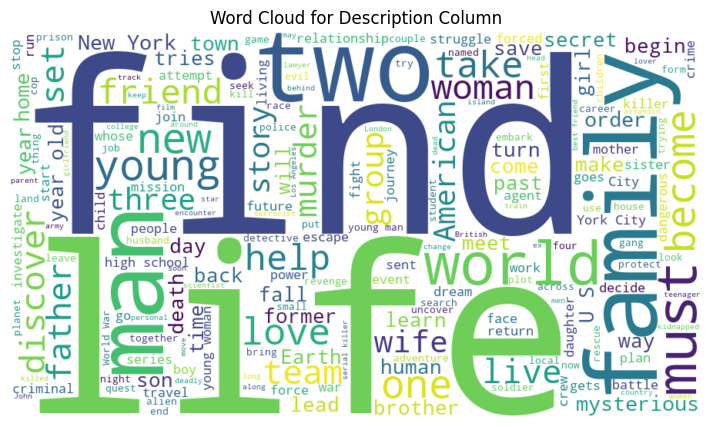

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(movie['description'].astype(str))

wordcloud = WordCloud(width=900, height=500, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Description Column')
plt.show()


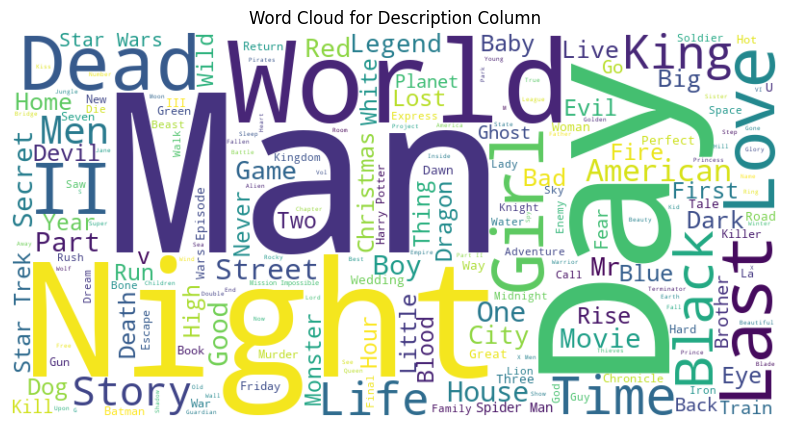

In [20]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(movie['title'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud for Description Column')
plt.show()


In [21]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

text_data = ' '.join(movie['title'].astype(str))

# Tokenize the text into words, excluding stopwords
words = [word.lower() for word in word_tokenize(text_data) if word.isalpha() and word.lower() not in stop_words]

# Use Counter to count word occurrences
word_counter = Counter(words)

# Get the most common words and their counts
most_common_words = word_counter.most_common(30)  # Change 10 to the desired number of top words

print("Top 30 most common words in the 'description' column (excluding stopwords):")
for word, count in most_common_words:
    print(f"{word}: {count}")


Top 30 most common words in the 'description' column (excluding stopwords):
man: 60
ii: 31
night: 30
dead: 28
world: 28
story: 26
last: 26
day: 25
love: 25
star: 24
black: 24
part: 22
life: 22
girl: 22
men: 20
american: 20
time: 20
king: 19
one: 17
war: 17
house: 17
good: 16
street: 16
movie: 16
red: 15
evil: 15
days: 15
city: 14
dark: 13
bad: 13


[nltk_data] Downloading package stopwords to C:\Users\mohamed
[nltk_data]     elsayed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download nltk resources if not already downloaded
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

text_data = ' '.join(movie['description'].astype(str))

# Tokenize the text into words, excluding stopwords
words = [word.lower() for word in word_tokenize(text_data) if word.isalpha() and word.lower() not in stop_words]

# Use Counter to count word occurrences
word_counter = Counter(words)

# Get the most common words and their counts
most_common_words = word_counter.most_common(30)  # Change 10 to the desired number of top words

# Print or display the results
print("Top 30 most common words in the 'description' column (excluding stopwords):")
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to C:\Users\mohamed
[nltk_data]     elsayed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 30 most common words in the 'description' column (excluding stopwords):
young: 397
new: 326
life: 325
two: 307
man: 293
must: 268
world: 267
family: 258
one: 232
woman: 212
love: 180
find: 171
finds: 167
war: 161
help: 147
friends: 147
story: 145
city: 141
years: 138
father: 136
home: 136
team: 134
girl: 129
school: 125
group: 124
wife: 123
becomes: 118
back: 115
mysterious: 114
three: 113


are there realtions among the numrical  values 

<Axes: >

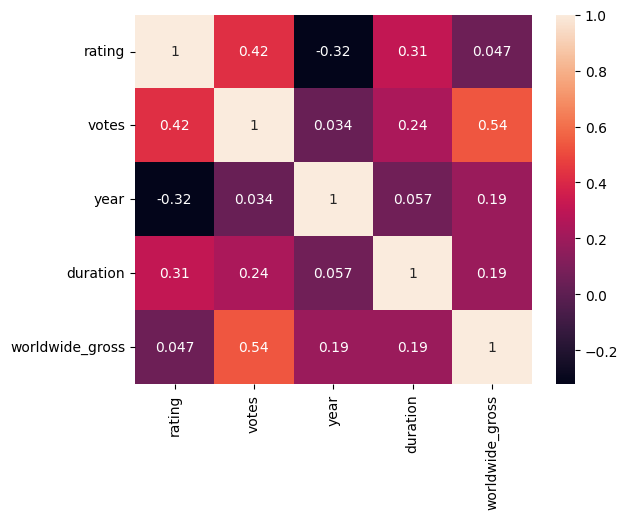

In [23]:
sns.heatmap(numeric_columns.corr(),annot=True)

year analysis 

In [24]:


import plotly.express as px
df=movie[movie["year"].isin(movie["year"].value_counts()[movie["year"].value_counts() > 10].index)].groupby("year")["rating"].mean().reset_index(name='rating')
fig = px.line(df, x='year', y='rating', title='Line Plot of Rating Over Time')
fig.show()


In [25]:


import plotly.express as px
movie.groupby("year")["duration"].mean()
fig = px.line(movie.groupby("year")["duration"].mean().reset_index(name='duration'), x='year', y='duration', title='Line Plot of duration Over Time')
fig.show()


In [26]:


import plotly.express as px
movie.groupby("year")["worldwide_gross"].sum()
fig = px.line(movie.groupby("year")["worldwide_gross"].sum().reset_index(name='worldwide_gross'), x='year', y='worldwide_gross', title='Line Plot of worldwide_gross Over Time')
fig.show()


genre analysis 

In [39]:
def split_values_genre(name):
    namelist=[]
    titles=[]
    coulmn=movie["genre"].dropna()
    for i in range(len(coulmn)):
        value=coulmn.str.split(",").iloc[i]
        if len(value)>1:
            for j in value:
                namelist.append(j)
                titles.append(movie[name].iloc[i])
        else:
            namelist.append(value[0])  
            titles.append(movie[name].iloc[i])
    df=pd.DataFrame({name:titles,"genre":namelist})
    return df
for i in movie.select_dtypes(include='number').drop(["rating"], axis=1).columns:

    df = split_values_genre(i)

    sorted_df = df.groupby("genre")[i].mean().reset_index().sort_values(i, ascending=True).head(10)

# Creating a bar chart using plotly express
    fig = px.bar(sorted_df, y='genre', x=i, orientation='h',
             color=i, text=i,
             title=f' Genres by Mean {i}')


# Show the plot
    fig.show()



rating analysis

In [62]:
def split_values(name,numric):
    namelist=[]
    titles=[]
    coulmn=movie[name].dropna()
    for i in range(len(coulmn)):
        value=coulmn.str.split(",").iloc[i]
        if len(value)>1:
            for j in value:
                namelist.append(j)
                titles.append(movie[numric].iloc[i])
        else:
            namelist.append(value[0])  
            titles.append(movie[numric].iloc[i])
    df=pd.DataFrame({numric:titles,name:namelist})
    return df
for i in splits.keys():

    df = split_values(i,"rating")
    df = df[df[i].isin(df[i].value_counts()[df[i].value_counts() > 10].index)]
    

    sorted_df = df.groupby(i)["rating"].mean().reset_index().sort_values("rating", ascending=False).head(10)

    # Creating a bar chart using plotly express
    display(sorted_df)

,country,rating
31,West Germany,7.835714
27,Turkey,7.558333
12,India,7.480435
19,Norway,7.450000
1,Austria,7.400000
20,Poland,7.378571
25,Sweden,7.377273
14,Italy,7.346535
23,South Korea,7.311111
7,Denmark,7.290476


,director,rating
2,Christopher Nolan,8.183333
24,Stanley Kubrick,8.090909
17,Quentin Tarantino,7.975000
0,Alfred Hitchcock,7.864706
16,Peter Jackson,7.763636
13,Martin Scorsese,7.700000
6,David Fincher,7.583333
26,Steven Spielberg,7.500000
29,Wes Anderson,7.427273
3,Clint Eastwood,7.409091


,stars,rating
46,Emma Watson,7.609091
99,Leonardo DiCaprio,7.583333
27,Clint Eastwood,7.561905
1,Al Pacino,7.477273
71,Jennifer Connelly,7.476923
96,Kevin Spacey,7.442857
128,Ralph Fiennes,7.407143
147,Shah Rukh Khan,7.400000
133,Robert Downey Jr.,7.381818
37,Dustin Hoffman,7.370588


,production_company,rating
116,WingNut Films,7.775000
35,Film i Väst,7.575000
79,Pixar Animation Studios,7.542857
44,Heyday Films,7.422222
55,Lucasfilm,7.415000
61,Marvel Entertainment,7.372222
80,Plan B Entertainment,7.346667
118,Zentropa Entertainments,7.330769
7,American Zoetrope,7.309091
112,Walt Disney Animation Studios,7.306383


,language,rating
31,Tamil,7.755556
32,Telugu,7.681818
38,Yiddish,7.575000
12,Hindi,7.524528
36,Urdu,7.441176
29,Swahili,7.366667
17,Japanese,7.336994
30,Swedish,7.317500
15,Irish Gaelic,7.300000
22,Persian,7.296970


,genre,rating
10,Film-Noir,7.978571
6,Documentary,7.683333
20,War,7.602667
21,Western,7.468750
3,Biography,7.422373
14,Musical,7.350000
11,History,7.340351
7,Drama,7.272529
2,Animation,7.236515
13,Music,7.152222


,writer,rating
4,Christopher Nolan,8.175000
12,Hayao Miyazaki,7.915385
21,Quentin Tarantino,7.884615
15,James Cameron,7.645455
7,Fran Walsh,7.625000
9,George Lucas,7.440000
31,Wes Anderson,7.427273
14,J.K. Rowling,7.400000
16,Joel Coen,7.389474
6,Ethan Coen,7.389474


Duration Analysis

In [61]:
def split_values(name,numric):
    namelist=[]
    titles=[]
    coulmn=movie[name].dropna()
    for i in range(len(coulmn)):
        value=coulmn.str.split(",").iloc[i]
        if len(value)>1:
            for j in value:
                namelist.append(j)
                titles.append(movie[numric].iloc[i])
        else:
            namelist.append(value[0])  
            titles.append(movie[numric].iloc[i])
    df=pd.DataFrame({numric:titles,name:namelist})
    return df
for i in splits.keys():

    df = split_values(i,"duration")
    df = df[df[i].isin(df[i].value_counts()[df[i].value_counts() > 10].index)]
    

    sorted_df = df.groupby(i)["duration"].mean().reset_index().sort_values("duration", ascending=False).head(10)
    display(sorted_df)



,country,duration
12,India,141.123188
27,Turkey,134.083333
31,West Germany,129.785714
19,Norway,126.722222
6,Czech Republic,126.208333
14,Italy,126.168317
18,New Zealand,125.463415
1,Austria,123.846154
11,Hungary,123.142857
28,United Arab Emirates,120.555556


,director,duration
16,Peter Jackson,151.545455
13,Martin Scorsese,145.857143
17,Quentin Tarantino,145.333333
14,Michael Bay,139.230769
24,Stanley Kubrick,137.090909
26,Steven Spielberg,136.709677
2,Christopher Nolan,136.583333
6,David Fincher,135.000000
15,Oliver Stone,134.666667
19,Ridley Scott,131.434783


,stars,duration
158,Viggo Mortensen,130.142857
1,Al Pacino,128.227273
134,Robert Duvall,126.909091
45,Emma Thompson,126.636364
55,Gwyneth Paltrow,124.583333
102,Mark Ruffalo,124.473684
99,Leonardo DiCaprio,124.333333
31,Daniel Craig,124.294118
133,Robert Downey Jr.,124.181818
147,Shah Rukh Khan,124.071429


,production_company,duration
116,WingNut Films,144.500000
23,DC Entertainment,132.294118
55,Lucasfilm,127.750000
62,Marvel Studios,126.575758
3,A24,124.882353
11,Atlas Entertainment,124.692308
14,Bad Robot,124.545455
44,Heyday Films,123.444444
13,BRON Studios,123.000000
61,Marvel Entertainment,122.555556


,language,duration
32,Telugu,141.090909
31,Tamil,136.888889
38,Yiddish,133.500000
33,Thai,127.588235
12,Hindi,126.367925
27,Serbian,123.066667
36,Urdu,121.058824
2,Cantonese,120.687500
37,Vietnamese,120.500000
24,Portuguese,120.472727


,genre,duration
11,History,135.964912
14,Musical,133.710526
20,War,132.533333
3,Biography,126.559322
21,Western,125.000000
7,Drama,120.133715
18,Sport,120.012048
0,Action,118.605263
17,Sci-Fi,116.222222
5,Crime,116.086321


,writer,duration
7,Fran Walsh,149.583333
15,James Cameron,145.727273
14,J.K. Rowling,144.272727
20,Oliver Stone,142.454545
4,Christopher Nolan,138.666667
3,Christopher Markus,136.909091
21,Quentin Tarantino,136.538462
25,Stan Lee,135.937500
18,John Logan,132.666667
1,Brian Helgeland,130.785714


parentalguide

In [55]:
import plotly.express as px
import seaborn as sns
# Assuming you have a DataFrame 'movie' with numerical columns

for i in movie.select_dtypes(include='number').drop(["rating","year"],axis=1).columns:  # select numeric columns only, drop "rating" and "year
    df=movie.groupby("parentalguide")[i].mean().reset_index(name=i).sort_values(by=[i],ascending=False) 
    fig = px.bar(df, x="parentalguide", y=i, title=f'Parental Guide by Mean {i}',color=i)
    fig.show()

    # Reverse the sorting of the bars

    # Show the plot
 
 




Worldwide Gross Analysis

In [57]:
def split_values(name,numric):
    namelist=[]
    titles=[]
    coulmn=movie[name].dropna()
    for i in range(len(coulmn)):
        value=coulmn.str.split(",").iloc[i]
        if len(value)>1:
            for j in value:
                namelist.append(j)
                titles.append(movie[numric].iloc[i])
        else:
            namelist.append(value[0])  
            titles.append(movie[numric].iloc[i])
    df=pd.DataFrame({numric:titles,name:namelist})
    return df
for i in splits.keys():

    df = split_values(i,"worldwide_gross")
    df = df[df[i].isin(df[i].value_counts()[df[i].value_counts() > 10].index)]
    

    sorted_df = df.groupby(i)["worldwide_gross"].sum().reset_index().sort_values("worldwide_gross", ascending=True).head(10)

    # Creating a bar chart using plotly express
    fig = px.bar(sorted_df, y= i, x="worldwide_gross",
                color='worldwide_gross', text='worldwide_gross',
                title=f'Top {i} by Mean worldwide_gross')

    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

    # Show the plot
    fig.show()